In [15]:
from data.load_data import load_and_split_data
from models.model1_logistic_regression import train_logistic_regression
from models.model2_simple_nn import SimpleLinearNN
from models.model3_sigmoid_nn import SigmoidNN
from models.model4_feedforward_nn import FeedForwardNN
from utils.train import train_model
from utils.evaluate import evaluate_model
from utils.plot_utils import plot_metrics
from sklearn import preprocessing
import pandas as pd
import torch
from torch.utils.data import TensorDataset

data_path = 'data/dataset.csv'
target = 'cid'
train_data, val_data, test_data = load_and_split_data(data_path)

X_train, y_train = train_data.drop(columns=[target]), train_data[target]
X_val, y_val = val_data.drop(columns=[target]), val_data[target]
X_test, y_test = test_data.drop(columns=[target]), test_data[target]

input_size = X_train.shape[1]

Modelo 1

In [16]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_val)

model1, accuracy_val = train_logistic_regression(X_scaled, y_train, X_validation_scaled, y_val)

print(f"Accuracy del Modelo 1 en el conjunto de validación: {accuracy_val:.4f}")


Accuracy del Modelo 1 en el conjunto de validación: 0.8140


Modelo 2

In [17]:
class_0 = train_data[train_data[target] == 0]
class_1 = train_data[train_data[target] == 1]

class_1_oversampled = class_1.sample(len(class_0), replace=True, random_state=0)
train_df_oversampled = pd.concat([class_0, class_1_oversampled])

X_train_oversampled = train_df_oversampled.drop(columns=[target]).values
y_train_oversampled = train_df_oversampled[target].values

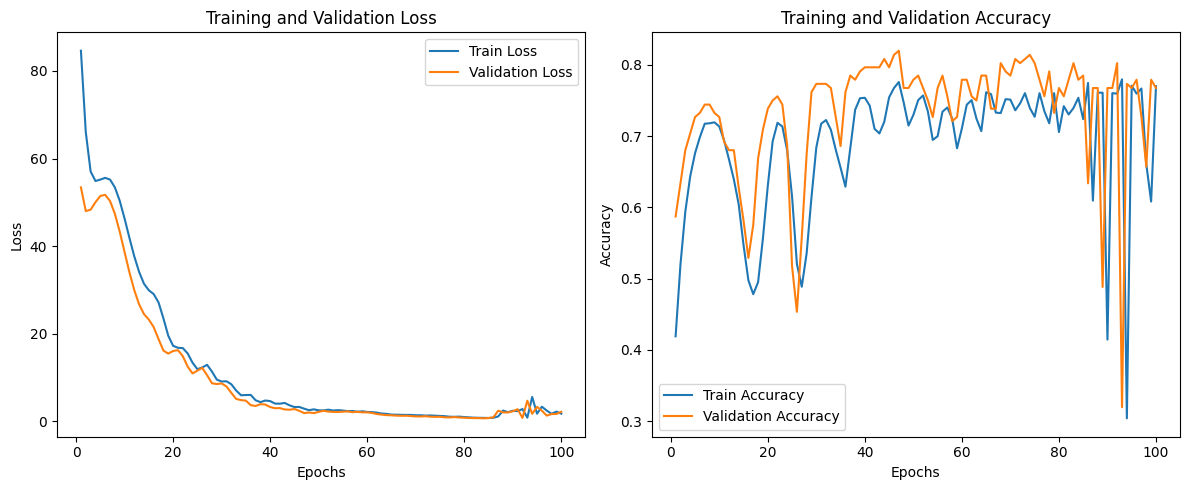

In [18]:
model2 = SimpleLinearNN(input_size=input_size)
epochs = 100
learning_rate = 0.01

X_train_tensor = torch.FloatTensor(X_train.values)
y_train_tensor = torch.LongTensor(y_train.values)
X_val_tensor = torch.FloatTensor(X_val.values)
y_val_tensor = torch.LongTensor(y_val.values)

train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model=model2,
    X_train=X_train_tensor,
    y_train=y_train_tensor,
    X_val=X_val_tensor,
    y_val=y_val_tensor,
    epochs=epochs,
    lr=learning_rate,
    criterion='CrossEntropyLoss'
)

epochs_list = range(1, len(train_losses) + 1)
plot_metrics(epochs_list, train_losses, val_losses, train_accuracies, val_accuracies)

Modelo 3

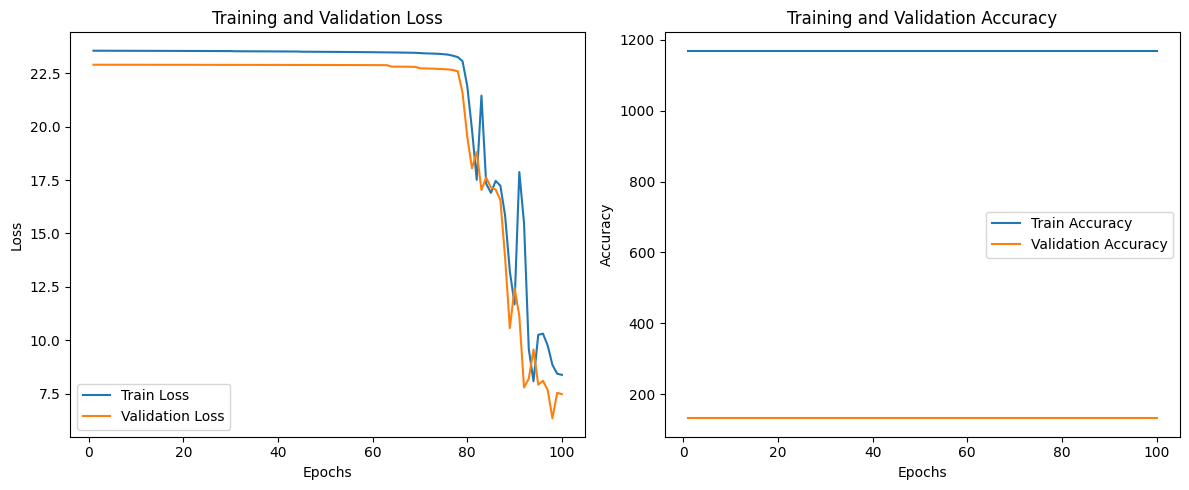

In [19]:
model3 = SigmoidNN(input_size=input_size)
X_train_tensor = torch.FloatTensor(X_train.values)
y_train_tensor = torch.FloatTensor(y_train.values).unsqueeze(1)
X_val_tensor = torch.FloatTensor(X_val.values)
y_val_tensor = torch.FloatTensor(y_val.values).unsqueeze(1)

train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model=model3,
    X_train=X_train_tensor,
    y_train=y_train_tensor,
    X_val=X_val_tensor,
    y_val=y_val_tensor,
    epochs=epochs,
    lr=learning_rate,
    criterion='BCELoss'
)

plot_metrics(epochs_list, train_losses, val_losses, train_accuracies, val_accuracies)

Modelo 4

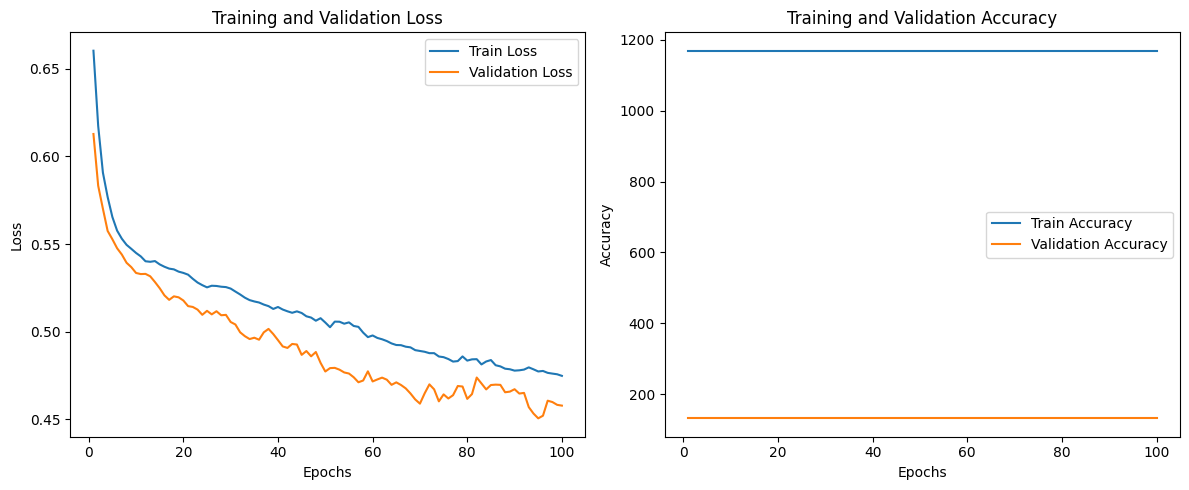

In [20]:
X_train_tensor = torch.FloatTensor(X_train.values)  # Características de entrenamiento
y_train_tensor = torch.FloatTensor(y_train.values).unsqueeze(1)  # Etiquetas de entrenamiento (convertidas a 2D)
X_val_tensor = torch.FloatTensor(X_val.values)      # Características de validación
y_val_tensor = torch.FloatTensor(y_val.values).unsqueeze(1)

model4 = FeedForwardNN(input_size=input_size)
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model=model4,
    X_train=X_train_tensor,
    y_train=y_train_tensor,
    X_val=X_val_tensor,
    y_val=y_val_tensor,
    epochs=epochs,
    lr=learning_rate,
    criterion='BCELoss'
)

plot_metrics(epochs_list, train_losses, val_losses, train_accuracies, val_accuracies)

In [21]:
results_list = []
models = [model1, model2, model3, model4]
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

for model, name in zip(models, model_names):
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    
    results_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })

results_df = pd.DataFrame(results_list)

print(results_df)


     Model  Accuracy  Precision    Recall        F1
0  Model 1  0.735981   0.491228  0.504505  0.497778
1  Model 2  0.745327   1.000000  0.018018  0.035398
2  Model 3  0.721963   0.457447  0.387387  0.419512
3  Model 4  0.785047   0.756757  0.252252  0.378378
